In [3]:
# Import Your Libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms

## Part 1

In [8]:
def draw_histogram(image):
  
  plt.hist(image[:,:,2].flatten(),256,[0,256], color = 'r')
  plt.show()

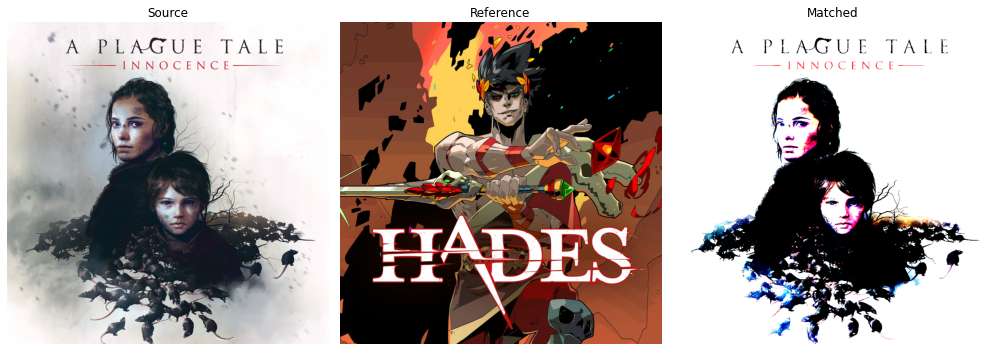

In [18]:
source = plt.imread('/content/A Plague Tale.jpg')
reference = plt.imread('/content/Hades.jpg')

### YOUR CODE ###
# START
matched = match_histograms(source, reference)
# END

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

# draw_histogram(source)
# draw_histogram(reference)
# draw_histogram(matched)

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

## Part 2

In [5]:
BRIGHTNESS_LAYERS = 256
def compute_cdf (image):
  pdf = np.zeros(BRIGHTNESS_LAYERS)

  for pixel in np.nditer(image) :
    pdf[np.round_(pixel)] += 1

  cdf = np.cumsum(pdf)

  return cdf

In [6]:
def split_channels(img):
  
  channels_count = img.shape[2]
  channels = [img[:,:,i] for i in range(channels_count)]

  return channels_count,channels

In [10]:
def match_histogram_channels(src , ref):
  
  transition= np.zeros((BRIGHTNESS_LAYERS))
  for i in range(1,BRIGHTNESS_LAYERS):
    for j in range(1,BRIGHTNESS_LAYERS):
      if ref[i] <= src[j]:
        transition[j] = i
        print('cdf found :' , i )
        break

  transition[BRIGHTNESS_LAYERS-1] = BRIGHTNESS_LAYERS-1
  return transition

cdf found : 1
cdf found : 2
cdf found : 3
cdf found : 4
cdf found : 5
cdf found : 6
cdf found : 7
cdf found : 8
cdf found : 9
cdf found : 10
cdf found : 11
cdf found : 12
cdf found : 13
cdf found : 14
cdf found : 15
cdf found : 16
cdf found : 17
cdf found : 18
cdf found : 19
cdf found : 20
cdf found : 21
cdf found : 22
cdf found : 23
cdf found : 24
cdf found : 25
cdf found : 26
cdf found : 27
cdf found : 28
cdf found : 29
cdf found : 30
cdf found : 31
cdf found : 32
cdf found : 33
cdf found : 34
cdf found : 35
cdf found : 36
cdf found : 37
cdf found : 38
cdf found : 39
cdf found : 40
cdf found : 41
cdf found : 42
cdf found : 43
cdf found : 44
cdf found : 45
cdf found : 46
cdf found : 47
cdf found : 48
cdf found : 49
cdf found : 50
cdf found : 51
cdf found : 52
cdf found : 53
cdf found : 54
cdf found : 55
cdf found : 56
cdf found : 57
cdf found : 58
cdf found : 59
cdf found : 60
cdf found : 61
cdf found : 62
cdf found : 63
cdf found : 64
cdf found : 65
cdf found : 66
cdf found : 67
cdf 

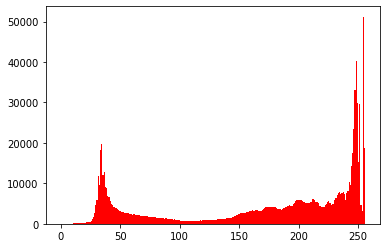

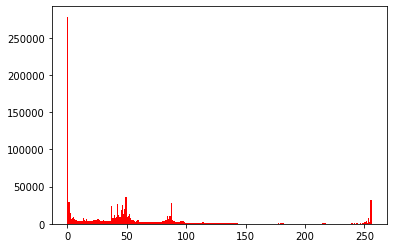

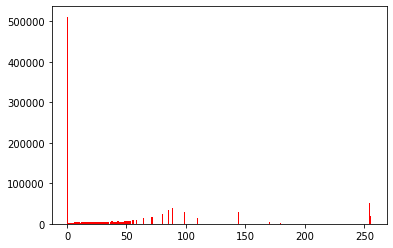

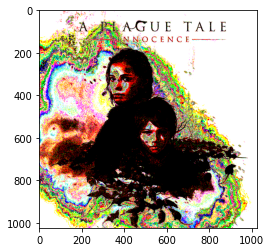

In [11]:
def hist_matching(src_image, ref_image):
  '''
  inputs:
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output:
    output_image (ndarray): transformed image 
  '''

  channels_count , src_channels = split_channels(src_image)
  channels_count , ref_channels = split_channels(ref_image)
  
  output_image = []
  for i in range(channels_count):
    src_channel = src_channels[i]
    src_cdf = compute_cdf(src_channel)

    ref_channel = ref_channels[i]
    ref_cdf = compute_cdf(ref_channel)

    transition = match_histogram_channels(src_cdf,ref_cdf)
    output_image.append(transition[src_channel])

  output_image = np.dstack((output_image[0],output_image[1],output_image[2]))
  
  assert output_image.shape == (1024,1024,3)

  draw_histogram(src_image)
  draw_histogram(ref_image)

  draw_histogram(output_image)
  
  ### YOUR CODE ###
  # START
  # matched = 
  # END

  plt.imshow(output_image)
  plt.show()


  # return output_image

source = plt.imread('/content/A Plague Tale.jpg')
reference = plt.imread('/content/Hades.jpg')

hist_matching(source , reference)

In [ ]:
source = plt.imread('A Plague Tale.jpg')
reference = plt.imread('Hades.jpg')

### YOUR CODE ###
# START
matched = 
# END

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

## Part 3